# Python 102

Based on Parts III and IV of [*A Crash Course in Python for Scientists*](http://nbviewer.jupyter.org/gist/rpmuller/5920182#ii.-numpy-and-scipy), version 0.6 by Rick Muller.

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US).

**NOTE** I haven't gone through this notebook yet, so there may be dated (e.g. Python 2) or irrelevant sections.

In [1]:
import numpy as np
import scipy as sp       # Can omit if your code doesn't use scipy functions
import matplotlib.pyplot as plt
%matplotlib inline

# Some more data analysis

## Numerical Integration
Integration can be hard, and sometimes it's easier to work out a definite integral using an approximation. For example, suppose we wanted to figure out the integral:

$$\int_0^\infty\exp(-x)dx=1$$

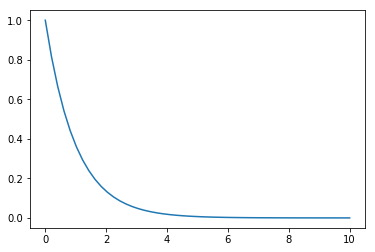

In [2]:
def f(x): return np.exp(-x)
x = np.linspace(0,10)
plt.plot(x, np.exp(-x))

In [3]:
from scipy.integrate import quad
quad(f, 0, np.inf)

(1.0000000000000002, 5.842606742906004e-11)

There are also 2d and 3d numerical integrators in Scipy. [See the docs](http://docs.scipy.org/doc/scipy/reference/integrate.html) for more information.

## Fast Fourier Transform and Signal Processing

Very often we want to use FFT techniques to help obtain the signal from noisy data. Scipy has several different options for this.

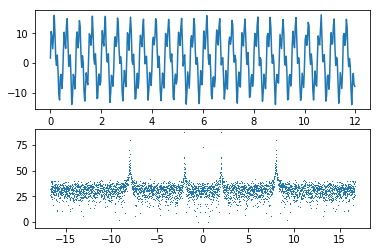

In [4]:
from scipy.fftpack import fft, fftfreq

npts = 4000
nplot = int(npts/10)
t = np.linspace(0, 120, npts)
def acc(t): return 10*np.sin(2*np.pi*2.0*t) + 5*np.sin(2*np.pi*8.0*t) + 2*np.random.rand(npts)

signal = acc(t)

FFT = abs(fft(signal))
freqs = fftfreq(npts, t[1]-t[0])

plt.subplot(2,1,1)  # 2 rows, 1 column. Doing plot 1
plt.plot(t[:nplot], signal[:nplot])
plt.subplot(2,1,2)  # 2 rows, 1 column. Doing plot 2
plt.plot(freqs, 20*np.log10(FFT), ',')

There are additional signal processing routines in Scipy that you can [read about here](http://docs.scipy.org/doc/scipy/reference/tutorial/signal.html).

# III. Intermediate Python

## Output Parsing
As more and more of our day-to-day work is being done on and through computers, we increasingly have output that one program writes, often in a text file, that we need to analyze in one way or another, and potentially feed that output into another file.

Suppose we have the following output:

In [137]:
myoutput = """\
@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5
@    1   -6095.25762870 -1.3D-01  0.00732  0.00168  0.32456  0.84140  10468.0
@    2   -6095.26325979 -5.6D-03  0.00233  0.00056  0.06294  0.14009  11963.5
@    3   -6095.26428124 -1.0D-03  0.00109  0.00024  0.03245  0.10269  13331.9
@    4   -6095.26463203 -3.5D-04  0.00057  0.00013  0.02737  0.09112  14710.8
@    5   -6095.26477615 -1.4D-04  0.00043  0.00009  0.02259  0.08615  20211.1
@    6   -6095.26482624 -5.0D-05  0.00015  0.00002  0.00831  0.03147  21726.1
@    7   -6095.26483584 -9.6D-06  0.00021  0.00004  0.01473  0.05265  24890.5
@    8   -6095.26484405 -8.2D-06  0.00005  0.00001  0.00555  0.01929  26448.7
@    9   -6095.26484599 -1.9D-06  0.00003  0.00001  0.00164  0.00564  27258.1
@   10   -6095.26484676 -7.7D-07  0.00003  0.00001  0.00161  0.00553  28155.3
@   11   -6095.26484693 -1.8D-07  0.00002  0.00000  0.00054  0.00151  28981.7
@   11   -6095.26484693 -1.8D-07  0.00002  0.00000  0.00054  0.00151  28981.7"""

This output actually came from a geometry optimization of a Silicon cluster using the [NWChem](http://www.nwchem-sw.org/index.php/Main_Page) quantum chemistry suite. At every step the program computes the energy of the molecular geometry, and then changes the geometry to minimize the computed forces, until the energy converges. I obtained this output via the unix command

    % grep @ nwchem.out

since NWChem is nice enough to precede the lines that you need to monitor job progress with the '@' symbol.

We could do the entire analysis in Python; I'll show how to do this later on, but first let's focus on turning this code into a usable Python object that we can plot.

First, note that the data is entered into a multi-line string. When Python sees three quote marks """ or ''' it treats everything following as part of a single string, including newlines, tabs, and anything else, until it sees the same three quote marks (""" has to be followed by another """, and ''' has to be followed by another ''') again. This is a convenient way to quickly dump data into Python, and it also reinforces the important idea that you don't have to open a file and deal with it one line at a time. You can read everything in, and deal with it as one big chunk.

The first thing we'll do, though, is to split the big string into a list of strings, since each line corresponds to a separate piece of data. We will use the **splitlines()** function on the big myout string to break it into a new element every time it sees a newline (\n) character:

In [138]:
lines = myoutput.splitlines()
lines

['@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime',
 '@ ---- ---------------- -------- -------- -------- -------- -------- --------',
 '@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5',
 '@    1   -6095.25762870 -1.3D-01  0.00732  0.00168  0.32456  0.84140  10468.0',
 '@    2   -6095.26325979 -5.6D-03  0.00233  0.00056  0.06294  0.14009  11963.5',
 '@    3   -6095.26428124 -1.0D-03  0.00109  0.00024  0.03245  0.10269  13331.9',
 '@    4   -6095.26463203 -3.5D-04  0.00057  0.00013  0.02737  0.09112  14710.8',
 '@    5   -6095.26477615 -1.4D-04  0.00043  0.00009  0.02259  0.08615  20211.1',
 '@    6   -6095.26482624 -5.0D-05  0.00015  0.00002  0.00831  0.03147  21726.1',
 '@    7   -6095.26483584 -9.6D-06  0.00021  0.00004  0.01473  0.05265  24890.5',
 '@    8   -6095.26484405 -8.2D-06  0.00005  0.00001  0.00555  0.01929  26448.7',
 '@    9   -6095.26484599 -1.9D-06  0.00003  0.00001  0.00164  0.00564  27258.1',
 '@   10   -6095

Splitting is a big concept in text processing. We used **splitlines()** here, and we will use the more general **split()** function below to split each line into whitespace-delimited words.

We now want to do three things:

* Skip over the lines that don't carry any information
* Break apart each line that does carry information and grab the pieces we want
* Turn the resulting data into something that we can plot.

For this data, we really only want the Energy column, the Gmax column (which contains the maximum gradient at each step), and perhaps the Walltime column. 

Since the data is now in a list of lines, we can iterate over it:

In [139]:
for line in lines[2:]:
    # do something with each line
    words = line.split()

Let's examine what we just did: first, we used a **for** loop to iterate over each line. However, we skipped the first two (the lines[2:] only takes the lines starting from index 2), since lines[0] contained the title information, and lines[1] contained underscores.

We then split each line into chunks (which we're calling "words", even though in most cases they're numbers) using the string **split()** command. Here's what split does:

In [140]:
import string
help(string.split)

Help on function split in module string:

split(s, sep=None, maxsplit=-1)
    split(s [,sep [,maxsplit]]) -> list of strings
    
    Return a list of the words in the string s, using sep as the
    delimiter string.  If maxsplit is given, splits at no more than
    maxsplit places (resulting in at most maxsplit+1 words).  If sep
    is not specified or is None, any whitespace string is a separator.
    
    (split and splitfields are synonymous)



Here we're implicitly passing in the first argument (s, in the doctext) by calling a method .split() on a string object. In this instance, we're not passing in a sep character, which means that the function splits on whitespace. Let's see what that does to one of our lines:

In [141]:
lines[2].split()

['@',
 '0',
 '-6095.12544083',
 '0.0D+00',
 '0.03686',
 '0.00936',
 '0.00000',
 '0.00000',
 '1391.5']

This is almost exactly what we want. We just have to now pick the fields we want:

In [142]:
for line in lines[2:]:
    # do something with each line
    words = line.split()
    energy = words[2]
    gmax = words[4]
    time = words[8]
    print energy,gmax,time

-6095.12544083 0.03686 1391.5
-6095.25762870 0.00732 10468.0
-6095.26325979 0.00233 11963.5
-6095.26428124 0.00109 13331.9
-6095.26463203 0.00057 14710.8
-6095.26477615 0.00043 20211.1
-6095.26482624 0.00015 21726.1
-6095.26483584 0.00021 24890.5
-6095.26484405 0.00005 26448.7
-6095.26484599 0.00003 27258.1
-6095.26484676 0.00003 28155.3
-6095.26484693 0.00002 28981.7
-6095.26484693 0.00002 28981.7


This is fine for printing things out, but if we want to do something with the data, either make a calculation with it or pass it into a plotting, we need to convert the strings into regular floating point numbers. We can use the **float()** command for this. We also need to save it in some form. I'll do this as follows:

In [143]:
data = []
for line in lines[2:]:
    # do something with each line
    words = line.split()
    energy = float(words[2])
    gmax = float(words[4])
    time = float(words[8])
    data.append((energy,gmax,time))
data = array(data)

We now have our data in a numpy array, so we can choose columns to print:

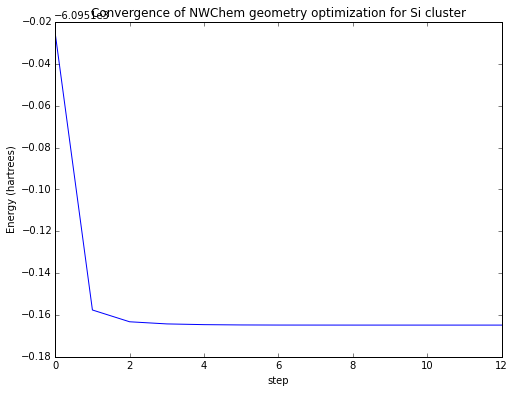

In [144]:
plot(data[:,0])
xlabel('step')
ylabel('Energy (hartrees)')
title('Convergence of NWChem geometry optimization for Si cluster')

I would write the code a little more succinctly if I were doing this for myself, but this is essentially a snippet I use repeatedly. 

Suppose our data was in CSV (comma separated values) format, a format that originally came from Microsoft Excel, and is increasingly used as a data interchange format in big data applications. How would we parse that?

In [145]:
csv = """\
-6095.12544083, 0.03686, 1391.5
-6095.25762870, 0.00732, 10468.0
-6095.26325979, 0.00233, 11963.5
-6095.26428124, 0.00109, 13331.9
-6095.26463203, 0.00057, 14710.8
-6095.26477615, 0.00043, 20211.1
-6095.26482624, 0.00015, 21726.1
-6095.26483584, 0.00021, 24890.5
-6095.26484405, 0.00005, 26448.7
-6095.26484599, 0.00003, 27258.1
-6095.26484676, 0.00003, 28155.3
-6095.26484693, 0.00002, 28981.7
-6095.26484693, 0.00002, 28981.7"""

We can do much the same as before:

In [146]:
data = []
for line in csv.splitlines():
    words = line.split(',')
    data.append(map(float,words))
data = array(data)

There are two significant changes over what we did earlier. First, I'm passing the comma character ',' into the split function, so that it breaks to a new word every time it sees a comma. Next, to simplify things a big, I'm using the **map()** command to repeatedly apply a single function (**float()**) to a list, and to return the output as a list.

In [147]:
help(map)

Help on built-in function map in module __builtin__:

map(...)
    map(function, sequence[, sequence, ...]) -> list
    
    Return a list of the results of applying the function to the items of
    the argument sequence(s).  If more than one sequence is given, the
    function is called with an argument list consisting of the corresponding
    item of each sequence, substituting None for missing values when not all
    sequences have the same length.  If the function is None, return a list of
    the items of the sequence (or a list of tuples if more than one sequence).



Despite the differences, the resulting plot should be the same:

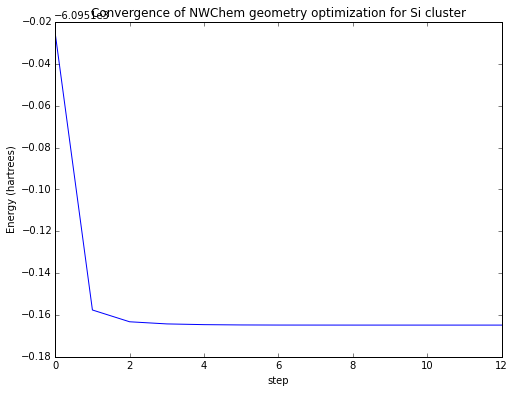

In [148]:
plot(data[:,0])
xlabel('step')
ylabel('Energy (hartrees)')
title('Convergence of NWChem geometry optimization for Si cluster')

Hartrees (what most quantum chemistry programs use by default) are really stupid units. We really want this in kcal/mol or eV or something we use. So let's quickly replot this in terms of eV above the minimum energy, which will give us a much more useful plot:

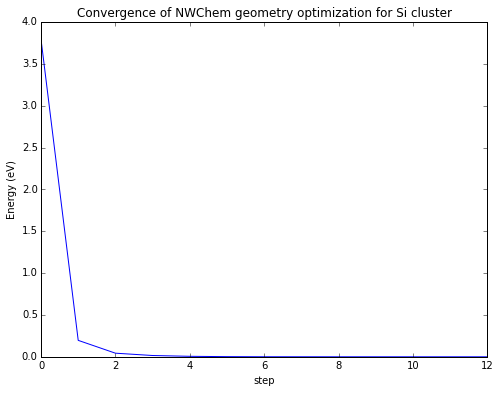

In [149]:
energies = data[:,0]
minE = min(energies)
energies_eV = 27.211*(energies-minE)
plot(energies_eV)
xlabel('step')
ylabel('Energy (eV)')
title('Convergence of NWChem geometry optimization for Si cluster')

This gives us the output in a form that we can think about: 4 eV is a fairly substantial energy change (chemical bonds are roughly this magnitude of energy), and most of the energy decrease was obtained in the first geometry iteration.

We mentioned earlier that we don't have to rely on **grep** to pull out the relevant lines for us. The **string** module has a lot of useful functions we can use for this. Among them is the **startswith** function. For example:

In [150]:
lines = """\
                 ----------------------------------------
                 |  WALL  |       0.45   |     443.61   |
                 ----------------------------------------

@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5
                                                       ok       ok



                                Z-matrix (autoz)
                                --------
""".splitlines()

for line in lines:
    if line.startswith('@'):
        print line
        

@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5


and we've successfully grabbed all of the lines that begin with the @ symbol.

The real value in a language like Python is that it makes it easy to take additional steps to analyze data in this fashion, which means you are thinking more about your data, and are more likely to see important patterns.

## More Sophisticated String Formatting and Processing
Strings are a big deal in most modern languages, and hopefully the previous sections helped underscore how versatile Python's string processing techniques are. We will continue this topic in this chapter.

We can print out lines in Python using the print command. 

In [151]:
print "I have 3 errands to run"

I have 3 errands to run


In IPython we don't even need the print command, since it will display the last expression not assigned to a variable.

In [152]:
"I have 3 errands to run"

'I have 3 errands to run'

**print** even converts some arguments to strings for us:

In [153]:
a,b,c = 1,2,3
print "The variables are ",1,2,3

The variables are  1 2 3


As versatile as this is, you typically need more freedom over the data you print out. For example, what if we want to print a bunch of data to exactly 4 decimal places? We can do this using formatted strings.

Formatted strings share a syntax with the C **printf** statement. We make a string that has some funny *format characters* in it, and then pass a bunch of variables into the string that fill out those characters in different ways.

For example,

In [154]:
print "Pi as a decimal = %d" % pi
print "Pi as a float = %f" % pi
print "Pi with 4 decimal places = %.4f" % pi
print "Pi with overall fixed length of 10 spaces, with 6 decimal places = %10.6f" % pi
print "Pi as in exponential format = %e" % pi

Pi as a decimal = 3
Pi as a float = 3.141593
Pi with 4 decimal places = 3.1416
Pi with overall fixed length of 10 spaces, with 6 decimal places =   3.141593
Pi as in exponential format = 3.141593e+00


We use a percent sign in two different ways here. First, the format character itself starts with a percent sign. %d or %i are for integers, %f is for floats, %e is for numbers in exponential formats. All of the numbers can take number immediately after the percent that specifies the total spaces used to print the number. Formats with a decimal can take an additional number after a dot . to specify the number of decimal places to print.

The other use of the percent sign is after the string, to pipe a set of variables in. You can pass in multiple variables (if your formatting string supports it) by putting a tuple after the percent. Thus,

In [155]:
print "The variables specified earlier are %d, %d, and %d" % (a,b,c)

The variables specified earlier are 1, 2, and 3


This is a simple formatting structure that will satisfy most of your string formatting needs. More information on different format symbols is available in the [string formatting part of the standard docs](http://docs.python.org/release/2.5.2/lib/typesseq-strings.html).

It's worth noting that more complicated string formatting methods are in development, but I prefer this system due to its simplicity and its similarity to C formatting strings.

Recall we discussed multiline strings. We can put format characters in these as well, and fill them with the percent sign as before.

In [156]:
form_letter = """\

          %s

Dear %s,

We regret to inform you that your product did not
ship today due to %s.

We hope to remedy this as soon as possible.

          From,
          Your Supplier
"""

print form_letter % ("July 1, 2013","Valued Customer Bob","alien attack")


          July 1, 2013

Dear Valued Customer Bob,

We regret to inform you that your product did not
ship today due to alien attack.

We hope to remedy this as soon as possible.

          From,
          Your Supplier



The problem with a long block of text like this is that it's often hard to keep track of what all of the variables are supposed to stand for. There's an alternate format where you can pass a dictionary into the formatted string, and give a little bit more information to the formatted string itself. This method looks like:

In [157]:
form_letter = """\

          %(date)s

Dear %(customer)s,

We regret to inform you that your product did not
ship today due to %(lame_excuse)s.

We hope to remedy this as soon as possible.

          From,
          Your Supplier
"""

print form_letter % {"date" : "July 1, 2013","customer":"Valued Customer Bob","lame_excuse":"alien attack"}


          July 1, 2013

Dear Valued Customer Bob,

We regret to inform you that your product did not
ship today due to alien attack.

We hope to remedy this as soon as possible.

          From,
          Your Supplier



By providing a little bit more information, you're less likely to make mistakes, like referring to your customer as "alien attack".

As a scientist, you're less likely to be sending bulk mailings to a bunch of customers. But these are great methods for generating and submitting lots of similar runs, say scanning a bunch of different structures to find the optimal configuration for something.

For example, you can use the following template for NWChem input files:

In [158]:
nwchem_format = """
start %(jobname)s

title "%(thetitle)s"
charge %(charge)d

geometry units angstroms print xyz autosym
%(geometry)s
end

basis
  * library 6-31G**
end

dft
  xc %(dft_functional)s
  mult %(multiplicity)d
end

task dft %(jobtype)s
"""

If you want to submit a sequence of runs to a computer somewhere, it's pretty easy to put together a little script, maybe even with some more string formatting in it:

In [159]:
oxygen_xy_coords = [(0,0),(0,0.1),(0.1,0),(0.1,0.1)]
charge = 0
multiplicity = 1
dft_functional = "b3lyp"
jobtype = "optimize"

geometry_template = """\
  O    %f     %f      0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0"""

for i,xy in enumerate(oxygen_xy_coords):
    thetitle = "Water run #%d" % i
    jobname = "h2o-%d" % i
    geometry = geometry_template % xy
    print "---------"
    print nwchem_format % dict(thetitle=thetitle,charge=charge,jobname=jobname,jobtype=jobtype,
                               geometry=geometry,dft_functional=dft_functional,multiplicity=multiplicity)

---------

start h2o-0

title "Water run #0"
charge 0

geometry units angstroms print xyz autosym
  O    0.000000     0.000000      0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0
end

basis
  * library 6-31G**
end

dft
  xc b3lyp
  mult 1
end

task dft optimize

---------

start h2o-1

title "Water run #1"
charge 0

geometry units angstroms print xyz autosym
  O    0.000000     0.100000      0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0
end

basis
  * library 6-31G**
end

dft
  xc b3lyp
  mult 1
end

task dft optimize

---------

start h2o-2

title "Water run #2"
charge 0

geometry units angstroms print xyz autosym
  O    0.100000     0.000000      0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0
end

basis
  * library 6-31G**
end

dft
  xc b3lyp
  mult 1
end

task dft optimize

---------

start h2o-3

title "Water run #3"
charge 0

geometry units angstroms print xyz autosym
  O    0.100000     0.100000      0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     

This is a very bad geometry for a water molecule, and it would be silly to run so many geometry optimizations of structures that are guaranteed to converge to the same single geometry, but you get the idea of how you can run vast numbers of simulations with a technique like this.

We used the **enumerate** function to loop over both the indices and the items of a sequence, which is valuable when you want a clean way of getting both. **enumerate** is roughly equivalent to:

In [160]:
def my_enumerate(seq):
    l = []
    for i in range(len(seq)):
        l.append((i,seq[i]))
    return l
my_enumerate(oxygen_xy_coords)

[(0, (0, 0)), (1, (0, 0.1)), (2, (0.1, 0)), (3, (0.1, 0.1))]

Although enumerate uses **generators** (see below) so that it doesn't have to create a big list, which makes it faster for really long sequenes.

## Optional arguments
You will recall that the **linspace** function can take either two arguments (for the starting and ending points):

In [161]:
linspace(0,1)

array([ 0.        ,  0.02040816,  0.04081633,  0.06122449,  0.08163265,
        0.10204082,  0.12244898,  0.14285714,  0.16326531,  0.18367347,
        0.20408163,  0.2244898 ,  0.24489796,  0.26530612,  0.28571429,
        0.30612245,  0.32653061,  0.34693878,  0.36734694,  0.3877551 ,
        0.40816327,  0.42857143,  0.44897959,  0.46938776,  0.48979592,
        0.51020408,  0.53061224,  0.55102041,  0.57142857,  0.59183673,
        0.6122449 ,  0.63265306,  0.65306122,  0.67346939,  0.69387755,
        0.71428571,  0.73469388,  0.75510204,  0.7755102 ,  0.79591837,
        0.81632653,  0.83673469,  0.85714286,  0.87755102,  0.89795918,
        0.91836735,  0.93877551,  0.95918367,  0.97959184,  1.        ])

or it can take three arguments, for the starting point, the ending point, and the number of points:

In [162]:
linspace(0,1,5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

You can also pass in keywords to exclude the endpoint:

In [163]:
linspace(0,1,5,endpoint=False)

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

Right now, we only know how to specify functions that have a fixed number of arguments. We'll learn how to do the more general cases here.

If we're defining a simple version of linspace, we would start with:

In [164]:
def my_linspace(start,end):
    npoints = 50
    v = []
    d = (end-start)/float(npoints-1)
    for i in range(npoints):
        v.append(start + i*d)
    return v
my_linspace(0,1)

[0.0,
 0.02040816326530612,
 0.04081632653061224,
 0.061224489795918366,
 0.08163265306122448,
 0.1020408163265306,
 0.12244897959183673,
 0.14285714285714285,
 0.16326530612244897,
 0.18367346938775508,
 0.2040816326530612,
 0.22448979591836732,
 0.24489795918367346,
 0.26530612244897955,
 0.2857142857142857,
 0.3061224489795918,
 0.32653061224489793,
 0.3469387755102041,
 0.36734693877551017,
 0.3877551020408163,
 0.4081632653061224,
 0.42857142857142855,
 0.44897959183673464,
 0.4693877551020408,
 0.4897959183673469,
 0.5102040816326531,
 0.5306122448979591,
 0.5510204081632653,
 0.5714285714285714,
 0.5918367346938775,
 0.6122448979591836,
 0.6326530612244897,
 0.6530612244897959,
 0.673469387755102,
 0.6938775510204082,
 0.7142857142857142,
 0.7346938775510203,
 0.7551020408163265,
 0.7755102040816326,
 0.7959183673469387,
 0.8163265306122448,
 0.836734693877551,
 0.8571428571428571,
 0.8775510204081632,
 0.8979591836734693,
 0.9183673469387754,
 0.9387755102040816,
 0.95918367346

We can add an optional argument by specifying a default value in the argument list:

In [165]:
def my_linspace(start,end,npoints = 50):
    v = []
    d = (end-start)/float(npoints-1)
    for i in range(npoints):
        v.append(start + i*d)
    return v

This gives exactly the same result if we don't specify anything:

In [166]:
my_linspace(0,1)

[0.0,
 0.02040816326530612,
 0.04081632653061224,
 0.061224489795918366,
 0.08163265306122448,
 0.1020408163265306,
 0.12244897959183673,
 0.14285714285714285,
 0.16326530612244897,
 0.18367346938775508,
 0.2040816326530612,
 0.22448979591836732,
 0.24489795918367346,
 0.26530612244897955,
 0.2857142857142857,
 0.3061224489795918,
 0.32653061224489793,
 0.3469387755102041,
 0.36734693877551017,
 0.3877551020408163,
 0.4081632653061224,
 0.42857142857142855,
 0.44897959183673464,
 0.4693877551020408,
 0.4897959183673469,
 0.5102040816326531,
 0.5306122448979591,
 0.5510204081632653,
 0.5714285714285714,
 0.5918367346938775,
 0.6122448979591836,
 0.6326530612244897,
 0.6530612244897959,
 0.673469387755102,
 0.6938775510204082,
 0.7142857142857142,
 0.7346938775510203,
 0.7551020408163265,
 0.7755102040816326,
 0.7959183673469387,
 0.8163265306122448,
 0.836734693877551,
 0.8571428571428571,
 0.8775510204081632,
 0.8979591836734693,
 0.9183673469387754,
 0.9387755102040816,
 0.95918367346

But also let's us override the default value with a third argument:

In [167]:
my_linspace(0,1,5)

[0.0, 0.25, 0.5, 0.75, 1.0]

We can add arbitrary keyword arguments to the function definition by putting a keyword argument \*\*kwargs handle in:

In [168]:
def my_linspace(start,end,npoints=50,**kwargs):
    endpoint = kwargs.get('endpoint',True)
    v = []
    if endpoint:
        d = (end-start)/float(npoints-1)
    else:
        d = (end-start)/float(npoints)
    for i in range(npoints):
        v.append(start + i*d)
    return v
my_linspace(0,1,5,endpoint=False)

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8]

What the keyword argument construction does is to take any additional keyword arguments (i.e. arguments specified by name, like "endpoint=False"), and stick them into a dictionary called "kwargs" (you can call it anything you like, but it has to be preceded by two stars). You can then grab items out of the dictionary using the **get** command, which also lets you specify a default value. I realize it takes a little getting used to, but it is a common construction in Python code, and you should be able to recognize it.

There's an analogous \*args that dumps any additional arguments into a list called "args". Think about the **range** function: it can take one (the endpoint), two (starting and ending points), or three (starting, ending, and step) arguments. How would we define this?

In [169]:
def my_range(*args):
    start = 0
    step = 1
    if len(args) == 1:
        end = args[0]
    elif len(args) == 2:
        start,end = args
    elif len(args) == 3:
        start,end,step = args
    else:
        raise Exception("Unable to parse arguments")
    v = []
    value = start
    while True:
        v.append(value)
        value += step
        if value > end: break
    return v

Note that we have defined a few new things you haven't seen before: a **break** statement, that allows us to exit a for loop if some conditions are met, and an exception statement, that causes the interpreter to exit with an error message. For example:

In [170]:
my_range()

Exception: Unable to parse arguments

## List Comprehensions and Generators
List comprehensions are a streamlined way to make lists. They look something like a list definition, with some logic thrown in. For example:

In [ ]:
evens1 = [2*i for i in range(10)]
print evens1

You can also put some boolean testing into the construct:

In [ ]:
odds = [i for i in range(20) if i%2==1]
odds

Here i%2 is the remainder when i is divided by 2, so that i%2==1 is true if the number is odd. Even though this is a relative new addition to the language, it is now fairly common since it's so convenient.

**iterators** are a way of making virtual sequence objects. Consider if we had the nested loop structure:

    for i in range(1000000):
        for j in range(1000000):

Inside the main loop, we make a list of 1,000,000 integers, just to loop over them one at a time. We don't need any of the additional things that a lists gives us, like slicing or random access, we just need to go through the numbers one at a time. And we're making 1,000,000 of them. 

**iterators** are a way around this. For example, the **xrange** function is the iterator version of range. This simply makes a counter that is looped through in sequence, so that the analogous loop structure would look like:

    for i in xrange(1000000):
        for j in xrange(1000000):

Even though we've only added two characters, we've dramatically sped up the code, because we're not making 1,000,000 big lists.

We can define our own iterators using the **yield** statement:

In [171]:
def evens_below(n):
    for i in xrange(n):
        if i%2 == 0:
            yield i
    return

for i in evens_below(9):
    print i

0
2
4
6
8


We can always turn an iterator into a list using the **list** command:

In [172]:
list(evens_below(9))

[0, 2, 4, 6, 8]

There's a special syntax called a **generator expression** that looks a lot like a list comprehension:

In [173]:
evens_gen = (i for i in xrange(9) if i%2==0)
for i in evens_gen:
    print i

0
2
4
6
8


## Factory Functions
A factory function is a function that returns a function. They have the fancy name *lexical closure*, which makes you sound really intelligent in front of your CS friends. But, despite the arcane names, factory functions can play a very practical role.

Suppose you want the Gaussian function centered at 0.5, with height 99 and width 1.0. You could write a general function.

In [174]:
def gauss(x,A,a,x0):
    return A*exp(-a*(x-x0)**2)

But what if you need a function with only one argument, like f(x) rather than f(x,y,z,...)? You can do this with Factory Functions:

In [175]:
def gauss_maker(A,a,x0):
    def f(x):
        return A*exp(-a*(x-x0)**2)
    return f

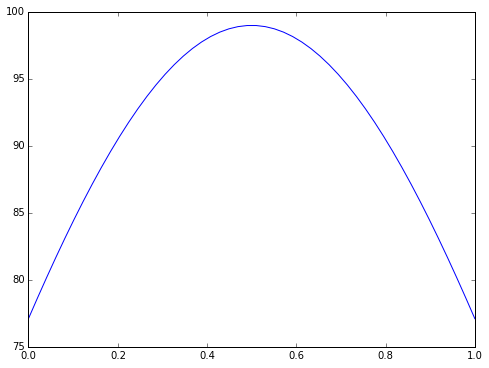

In [176]:
x = linspace(0,1)
g = gauss_maker(99.0,1.0,0.5)
plot(x,g(x))

Everything in Python is an object, including functions. This means that functions can be returned by other functions. (They can also be passed into other functions, which is also useful, but a topic for another discussion.) In the **gauss_maker** example, the *g* function that is output "remembers" the A, a, x0 values it was constructed with, since they're all stored in the local memory space (this is what the *lexical closure* really refers to) of that function.

Factories are one of the more important of the [Software Design Patterns](http://en.wikipedia.org/wiki/Software_design_pattern), which are a set of guidelines to follow to make high-quality, portable, readable, stable software. It's beyond the scope of the current work to go more into either factories or design patterns, but I thought I would mention them for people interested in software design.

## Serialization: Save it for later
*Serialization* refers to the process of outputting data (and occasionally functions) to a database or a regular file, for the purpose of using it later on. In the very early days of programming languages, this was normally done in regular text files. Python is excellent at text processing, and you probably already know enough to get started with this.

When accessing large amounts of data became important, people developed database software based around the Structured Query Language (SQL) standard. I'm not going to cover SQL here, but, if you're interested, I recommend using the [sqlite3](http://docs.python.org/2/library/sqlite3.html) module in the Python standard library.

As data interchange became important, the eXtensible Markup Language (XML) has emerged. XML makes data formats that are easy to write parsers for, greatly simplifying the ambiguity that sometimes arises in the process. Again, I'm not going to cover XML here, but if you're interested in learning more, look into [Element Trees](http://docs.python.org/2/library/xml.etree.elementtree.html), now part of the Python standard library.

Python has a very general serialization format called **pickle** that can turn any Python object, even a function or a class, into a representation that can be written to a file and read in later. But, again, I'm not going to talk about this, since I rarely use it myself. Again, [the standard library documentation for pickle](http://docs.python.org/2/library/pickle.html#module-cPickle) is the place to go.

What I am going to talk about is a relatively recent format call [JavaScript Object Notation](http://json.org/) (JSON) that has become very popular over the past few years. [There's a module in the standard library](http://docs.python.org/2/library/json.html) for encoding and decoding JSON formats. The reason I like JSON so much is that it looks almost like Python, so that, unlike the other options, you can look at your data and edit it, use it in another program, etc.

Here's a little example:

In [177]:
# Data in a json format:
json_data = """\
{
    "a": [1,2,3],
    "b": [4,5,6],
    "greeting" : "Hello"
}"""
import json
json.loads(json_data)

{u'a': [1, 2, 3], u'b': [4, 5, 6], u'greeting': u'Hello'}

Ignore the little u's before the strings, these just mean the strings are in UNICODE. Your data sits in something that looks like a Python dictionary, and in a single line of code, you can load it into a Python dictionary for use later.

In the same way, you can, with a single line of code, put a bunch of variables into a dictionary, and then output to a file using json:

In [178]:
json.dumps({"a":[1,2,3],"b":[9,10,11],"greeting":"Hola"})

'{"a": [1, 2, 3], "b": [9, 10, 11], "greeting": "Hola"}'

## Functional programming
Functional programming is a very broad subject. The idea is to have a series of functions, each of which generates a new data structure from an input, without changing the input structure at all. By not modifying the input structure (something that is called not having *side effects*), many guarantees can be made about how independent the processes are, which can help parallelization and guarantees of program accuracy. There is a [Python Functional Programming HOWTO](http://docs.python.org/2/howto/functional.html) in the standard docs that goes into more details on functional programming. I just wanted to touch on a few of the most important ideas here.

There is an **operator** module that has function versions of most of the Python operators. For example:

In [179]:
from operator import add, mul
add(1,2)

3

In [180]:
mul(3,4)

12

These are useful building blocks for functional programming.

The **lambda** operator allows us to build *anonymous functions*, which are simply functions that aren't defined by a normal **def** statement with a name. For example, a function that doubles the input is:

In [181]:
def doubler(x): return 2*x
doubler(17)

34

We could also write this as:

In [182]:
lambda x: 2*x

<function __main__.<lambda>>

And assign it to a function separately:

In [183]:
another_doubler = lambda x: 2*x
another_doubler(19)

38

**lambda** is particularly convenient (as we'll see below) in passing simple functions as arguments to other functions.

**map** is a way to repeatedly apply a function to a list:

In [184]:
map(float,'1 2 3 4 5'.split())

[1.0, 2.0, 3.0, 4.0, 5.0]

**reduce** is a way to repeatedly apply a function to the first two items of the list. There already is a **sum** function in Python that is a reduction:

In [185]:
sum([1,2,3,4,5])

15

We can use **reduce** to define an analogous **prod** function:

In [186]:
def prod(l): return reduce(mul,l)
prod([1,2,3,4,5])

120

## Object Oriented Programming

We've seen a lot of examples of **objects** in Python. We create a string object with quote marks:

In [187]:
mystring = "Hi there"

and we have a bunch of methods we can use on the object:

In [188]:
mystring.split()

['Hi', 'there']

In [189]:
mystring.startswith('Hi')

True

In [190]:
len(mystring)

8

Object oriented programming simply gives you the tools to define objects and methods for yourself. It's useful anytime you want to keep some data (like the characters in the string) tightly coupled to the functions that act on the data (length, split, startswith, etc.).

As an example, we're going to bundle the functions we did to make the 1d harmonic oscillator eigenfunctions with arbitrary potentials, so we can pass in a function defining that potential, some additional specifications, and get out something that can plot the orbitals, as well as do other things with them, if desired.

In [191]:
class Schrod1d:
    """\
    Schrod1d: Solver for the one-dimensional Schrodinger equation.
    """
    def __init__(self,V,start=0,end=1,npts=50,**kwargs):
        m = kwargs.get('m',1.0)
        self.x = linspace(start,end,npts)
        self.Vx = V(self.x)
        self.H = (-0.5/m)*self.laplacian() + diag(self.Vx)
        return
    
    def plot(self,*args,**kwargs):
        titlestring = kwargs.get('titlestring',"Eigenfunctions of the 1d Potential")
        xstring = kwargs.get('xstring',"Displacement (bohr)")
        ystring = kwargs.get('ystring',"Energy (hartree)")
        if not args:
            args = [3]
        x = self.x
        E,U = eigh(self.H)
        h = x[1]-x[0]

        # Plot the Potential
        plot(x,self.Vx,color='k')

        for i in range(*args):
            # For each of the first few solutions, plot the energy level:
            axhline(y=E[i],color='k',ls=":")
            # as well as the eigenfunction, displaced by the energy level so they don't
            # all pile up on each other:
            plot(x,U[:,i]/sqrt(h)+E[i])
        title(titlestring)
        xlabel(xstring)
        ylabel(ystring) 
        return
        
    def laplacian(self):
        x = self.x
        h = x[1]-x[0] # assume uniformly spaced points
        n = len(x)
        M = -2*identity(n,'d')
        for i in range(1,n):
            M[i,i-1] = M[i-1,i] = 1
        return M/h**2

The **__init__()** function specifies what operations go on when the object is created. The **self** argument is the object itself, and we don't pass it in. The only required argument is the function that defines the QM potential. We can also specify additional arguments that define the numerical grid that we're going to use for the calculation.

For example, to do an infinite square well potential, we have a function that is 0 everywhere. We don't have to specify the barriers, since we'll only define the potential in the well, which means that it can't be defined anywhere else.

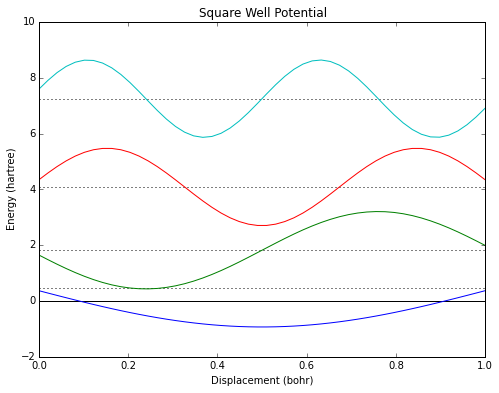

In [192]:
square_well = Schrod1d(lambda x: 0*x,m=10)
square_well.plot(4,titlestring="Square Well Potential")

We can similarly redefine the Harmonic Oscillator potential.

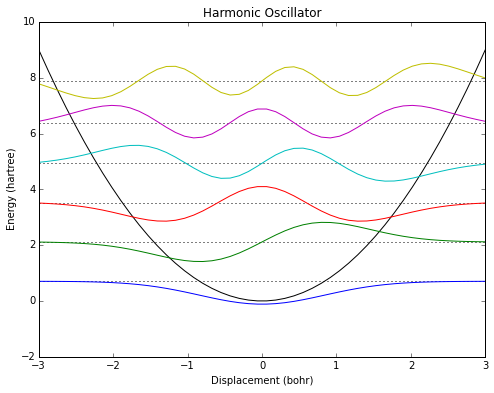

In [193]:
ho = Schrod1d(lambda x: x**2,start=-3,end=3)
ho.plot(6,titlestring="Harmonic Oscillator")

Let's define a finite well potential:

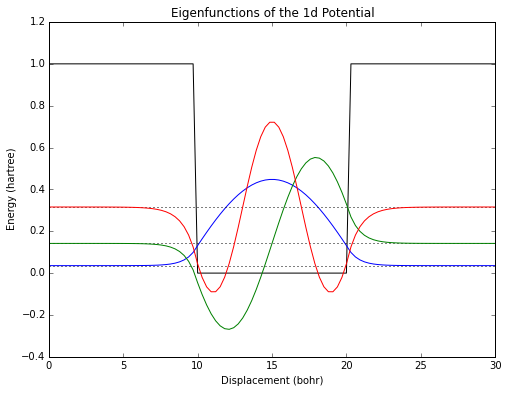

In [194]:
def finite_well(x,V_left=1,V_well=0,V_right=1,d_left=10,d_well=10,d_right=10):
    V = zeros(x.size,'d')
    for i in range(x.size):
        if x[i] < d_left: 
            V[i] = V_left
        elif x[i] > (d_left+d_well):
            V[i] = V_right
        else:
            V[i] = V_well
    return V
        
fw = Schrod1d(finite_well,start=0,end=30,npts=100)
fw.plot()

A triangular well:

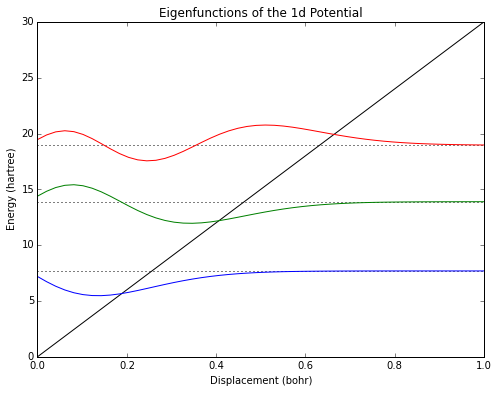

In [195]:
def triangular(x,F=30): return F*x

tw = Schrod1d(triangular,m=10)
tw.plot()

Or we can combine the two, making something like a semiconductor quantum well with a top gate:

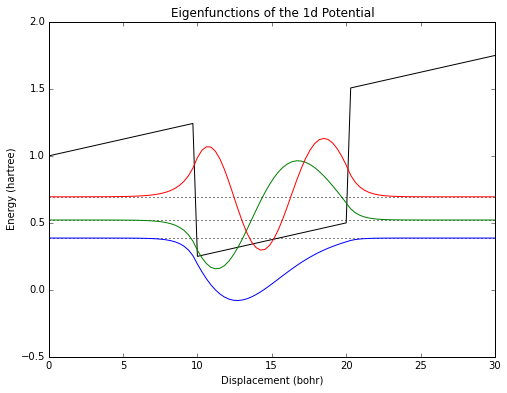

In [196]:
def tri_finite(x): return finite_well(x)+triangular(x,F=0.025)

tfw = Schrod1d(tri_finite,start=0,end=30,npts=100)
tfw.plot()

There's a lot of philosophy behind object oriented programming. Since I'm trying to focus on just the basics here, I won't go into them, but the internet is full of lots of resources on OO programming and theory. The best of this is contained in the [Design Patterns](http://en.wikipedia.org/wiki/Design_Patterns_(book)) book, which I highly recommend.

# IV. Speeding Python: Timeit, Profiling, Cython, SWIG, and PyPy

The first rule of speeding up your code is not to do it at all. As Donald Knuth said:

> "We should forget about small efficiencies, say about 97% of the time: premature optimization is the root of all evil."

The second rule of speeding up your code is to only do it if you really think you need to do it. Python has two tools to help with this process: a timing program called **timeit**, and a very good code profiler. We will discuss both of these tools in this section, as well as techniques to use to speed up your code once you know it's too slow.

## Timeit
**timeit** helps determine which of two similar routines is faster. Recall that some time ago we wrote a factorial routine, but also pointed out that Python had its own routine built into the math module. Is there any difference in the speed of the two? **timeit** helps us determine this. For example, **timeit** tells how long each method takes:

In [197]:
%timeit factorial(20)

1000000 loops, best of 3: 714 ns per loop


The little % sign that we have in front of the timeit call is an example of an IPython magic function, which we don't have time to go into here, but it's just some little extra mojo that IPython adds to the functions to make it run better in the IPython environment. You can read more about it in the [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html).

In any case, the timeit function runs 3 loops, and tells us that it took on the average of 583 ns to compute 20!. In contrast:

In [198]:
%timeit fact(20)

100000 loops, best of 3: 6 µs per loop


the factorial function we wrote is about a factor of 10 slower. This is because the built-in factorial function is written in C code and called from Python, and the version we wrote is written in plain old Python. A Python program has a lot of stuff in it that make it nice to interact with, but all that friendliness slows down the code. In contrast, the C code is less friendly but more efficient. If you want speed with as little effort as possible, write your code in an easy to program language like Python, but dump the slow parts into a faster language like C, and call it from Python. We'll go through some tricks to do this in this section.

## Profiling

Profiling complements what **timeit** does by splitting the overall timing into the time spent in each function. It can give us a better understanding of what our program is really spending its time on.

Suppose we want to create a list of even numbers. Our first effort yields this:

In [199]:
def evens(n):
    "Return a list of even numbers below n"
    l = []
    for x in range(n):
        if x % 2 == 0:
            l.append(x)
    return l

Is this code fast enough? We find out by running the Python profiler on a longer run:

In [200]:
import cProfile
cProfile.run('evens(100000)')

         50004 function calls in 0.048 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.038    0.038    0.048    0.048 <ipython-input-199-9d23d9d62f6b>:1(evens)
        1    0.001    0.001    0.048    0.048 <string>:1(<module>)
    50000    0.007    0.000    0.007    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.003    0.003    0.003    0.003 {range}




This looks okay, 0.05 seconds isn't a *huge* amount of time, but looking at the profiling shows that the **append** function is taking almost 20% of the time. Can we do better? Let's try a list comprehension.

In [201]:
def evens2(n):
    "Return a list of even numbers below n"
    return [x for x in range(n) if x % 2 == 0]

In [202]:
import cProfile
cProfile.run('evens2(100000)')

         4 function calls in 0.022 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.020    0.020    0.022    0.022 <ipython-input-201-cbb0d0b3fc58>:1(evens2)
        1    0.001    0.001    0.022    0.022 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.001    0.001    0.001    0.001 {range}




By removing a small part of the code using a list comprehension, we've doubled the overall speed of the code! 

It seems like **range** is taking a long time, still. Can we get rid of it? We can, using the **xrange** generator:

In [203]:
def evens3(n):
    "Return a list of even numbers below n"
    return [x for x in xrange(n) if x % 2 == 0]

In [204]:
import cProfile
cProfile.run('evens3(100000)')

         3 function calls in 0.021 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.021    0.021    0.021    0.021 <ipython-input-203-3ee1b2b2b034>:1(evens3)
        1    0.001    0.001    0.021    0.021 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




This is where profiling can be useful. Our code now runs 3x faster by making trivial changes. We wouldn't have thought to look in these places had we not had access to easy profiling. Imagine what you would find in more complicated programs.

## Other Ways to Speed Python
When we compared the fact and factorial functions, above, we noted that C routines are often faster because they're more streamlined. Once we've determined that one routine is a bottleneck for the performance of a program, we can replace it with a faster version by writing it in C. This is called *extending* Python, and there's a [good section in the standard documents](http://docs.python.org/2/extending/extending.html). This can be a tedious process if you have many different routines to convert. Fortunately, there are several other options.

[Swig](http://swig.org/) (the simplified wrapper and interface generator) is a method to generate binding not only for Python but also for Matlab, Perl, Ruby, and other scripting languages. Swig can scan the header files of a C project and generate Python binding for it. Using Swig is substantially easier than writing the routines in C.

[Cython](http://www.cython.org/) is a C-extension language. You can start by compiling a Python routine into a shared object libraries that can be imported into faster versions of the routines. You can then add additional static typing and make other restrictions to further speed the code. Cython is generally easier than using Swig.

[PyPy](http://pypy.org/) is the easiest way of obtaining fast code. PyPy compiles Python to a subset of the Python language called RPython that can be efficiently compiled and optimized. Over a wide range of tests, PyPy is [roughly 6 times faster than the standard Python Distribution](http://speed.pypy.org/).

## Fun: Finding Primes

[Project Euler](http://projecteuler.net) is a site where programming puzzles are posed that might have interested Euler. [Problem 7](http://projecteuler.net/problem=7) asks the question:

> By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.
> 
> What is the 10,001st prime number?

To solve this we need a very long list of prime numbers. First we'll make a function that uses the Sieve of Erastothenes to generate all the primes less than n.

In [205]:
def primes(n):
    """\
    From python cookbook, returns a list of prime numbers from 2 to < n

    >>> primes(2)
    [2]
    >>> primes(10)
    [2, 3, 5, 7]
    """
    if n==2: return [2]
    elif n<2: return []
    s=range(3,n+1,2)
    mroot = n ** 0.5
    half=(n+1)/2-1
    i=0
    m=3
    while m <= mroot:
        if s[i]:
            j=(m*m-3)/2
            s[j]=0
            while j<half:
                s[j]=0
                j+=m
        i=i+1
        m=2*i+3
    return [2]+[x for x in s if x]

In [206]:
number_to_try = 1000000
list_of_primes = primes(number_to_try)
print list_of_primes[10001]

104759


You might think that Python is a bad choice for something like this, but, in terms of time, it really doesn't take long:

In [207]:
cProfile.run('primes(1000000)')

         4 function calls in 0.372 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.335    0.335    0.363    0.363 <ipython-input-205-57e280631d57>:1(primes)
        1    0.009    0.009    0.372    0.372 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.028    0.028    0.028    0.028 {range}




Only takes 1/4 of a second to generate a list of all the primes below 1,000,000. It would be nice if we could use the same trick to get rid of the **range** function, but we actually need it, since we're using the object like a list, rather than like a counter as before.

# VII. References

## Learning Resources
* [Official Python Documentation](http://docs.python.org/2.7), including
    - [Python Tutorial](http://docs.python.org/2.7/tutorial)
    - [Python Language Reference](http://docs.python.org/2.7/reference)
* If you're interested in Python 3, the [Official Python 3 Docs are here](http://docs.python.org/3/).
* [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html).
* [Learn Python The Hard Way](http://learnpythonthehardway.org/book/)
* [Dive Into Python](http://www.diveintopython.net/), in particular if you're interested in Python 3.
* [Invent With Python](http://inventwithpython.com/), probably best for kids.
* [Python Functional Programming HOWTO](http://docs.python.org/2/howto/functional.html)
* [The Structure and Interpretation of Computer Programs](http://mitpress.mit.edu/sicp/full-text/book/book.html), written in Scheme, a Lisp dialect, but one of the best books on computer programming ever written.
* [Generator Tricks for Systems Programmers](http://www.dabeaz.com/generators/) Beazley's slides on just what generators can do for you.
* [Python Module of the Week](http://pymotw.com/2/contents.html) is a series going through in-depth analysis of the Python standard library in a very easy to understand way.

## Badass IPython Notebooks
* Rob Johansson's [excellent notebooks](http://jrjohansson.github.io/), including [Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures) and [Computational Quantum Physics with QuTiP](https://github.com/jrjohansson/qutip-lectures) lectures;
* [XKCD style graphs in matplotlib](http://nbviewer.ipython.org/url/jakevdp.github.com/downloads/notebooks/XKCD_plots.ipynb);
* [A collection of Notebooks for using IPython effectively](https://github.com/ipython/ipython/tree/master/examples/notebooks#a-collection-of-notebooks-for-using-ipython-effectively)
* [A gallery of interesting IPython Notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)
* [Cross-disciplinary computational analysis IPython Notebooks From Hadoop World 2012](https://github.com/invisibleroads/crosscompute-tutorials)
* [Quantites](http://nbviewer.ipython.org/urls/raw.github.com/tbekolay/pyconca2012/master/QuantitiesTutorial.ipynb) Units in Python.
    - [Another units module is here](http://www.southampton.ac.uk/~fangohr/blog/)

## Packages for Scientists
Important libraries

* [Python](http://www.python.org) version 2.7;
* [Numpy](http://www.numpy.org), the core numerical extensions for linear algebra and multidimensional arrays;
* [Scipy](http://www.scipy.org), additional libraries for scientific programming;
* [Matplotlib](http://matplotlib.sf.net), excellent plotting and graphing libraries;
* [IPython](http://ipython.org), with the additional libraries required for the notebook interface.
* [Sympy](http://sympy.org), symbolic math in Python
* [Pandas](http://pandas.pydata.org/) library for big data in Python

Other packages of interest

* [PyQuante](http://pyquante.sf.net) Python Quantum Chemistry
* [QuTiP](https://code.google.com/p/qutip/) Quantum Toolbox in Python
* Konrad Hinsen's [Scientific Python](http://dirac.cnrs-orleans.fr/plone/software/scientificpython/) and [MMTK](http://dirac.cnrs-orleans.fr/MMTK/)
* [Atomic Simulation Environment](https://wiki.fysik.dtu.dk/ase/)


## Cool Stuff
* [Moin Moin](http://moinmo.in/), a wiki written in Python
* [Project Euler](http://projecteuler.net/), programming problems that would (?) have interested Euler. Python is one of the most commonly used languages there.

# VI. Acknowledgements
Thanks to Alex and Tess for everything!

Thanks to Barbara Muller and Tom Tarman for helpful suggestions.

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). The work is offered for free, with the hope that it will be useful. Please consider making a donation to the [John Hunter Memorial Fund](http://numfocus.org/johnhunter/).

![CC BY SA](http://i.creativecommons.org/l/by-sa/3.0/88x31.png)

![Sandia](http://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Sandia_National_Laboratories_logo.svg/200px-Sandia_National_Laboratories_logo.svg.png)

Sandia is a multiprogram laboratory operated by Sandia Corporation, a Lockheed Martin Company, for the United States Department of Energy's National Nuclear Security Administration under Contract DE-AC04-94AL85000.

![DOE](http://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/US-DeptOfEnergy-Seal.svg/200px-US-DeptOfEnergy-Seal.svg.png)